In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
train_dir = r'C:\Users\srina\Python_Notebooks\Data\cats_and_dogs_small\train'
validation_dir = r'C:\Users\srina\Python_Notebooks\Data\cats_and_dogs_small\validation'
test_dir =r'C:\Users\srina\Python_Notebooks\Data\cats_and_dogs_small\test'

### Data Preprocessing

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [21]:
# Generating batches of tensor image data
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [22]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [23]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [25]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [26]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/20
100/100 [==============================] - 101s 1s/step - loss: 0.6918 - acc: 0.5195 - val_loss: 0.6758 - val_acc: 0.5310
Epoch 2/20
100/100 [==============================] - 103s 1s/step - loss: 0.6655 - acc: 0.6045 - val_loss: 0.6767 - val_acc: 0.5660
Epoch 3/20
100/100 [==============================] - 89s 889ms/step - loss: 0.6317 - acc: 0.6405 - val_loss: 0.6225 - val_acc: 0.6600
Epoch 4/20
100/100 [==============================] - 88s 885ms/step - loss: 0.5844 - acc: 0.6945 - val_loss: 0.6870 - val_acc: 0.6030
Epoch 5/20
100/100 [==============================] - 89s 886ms/step - loss: 0.5460 - acc: 0.7165 - val_loss: 0.6240 - val_acc: 0.6420
Epoch 6/20
100/100 [==============================] - 89s 886ms/step - loss: 0.5216 - acc: 0.7335 - val_loss: 0.5848 - val_acc: 0.6820
Epoch 7/20
100/100 [==============================] - 89s 886ms/step - loss: 0.4900 - acc: 0.7615 - val_loss: 0.5633 - val_acc: 0.7050
Epoch 8/20
100/100 [==============================] - 88s 8

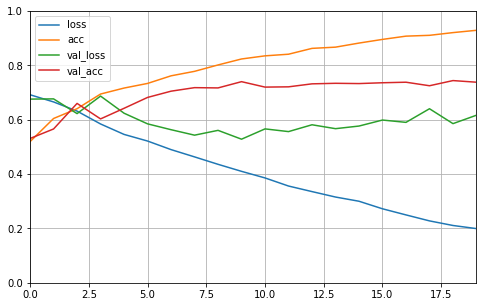

In [27]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [28]:
model.save("model.h5")

In [6]:
from tensorflow.keras import backend as K 

K.clear_session()
del model

NameError: name 'model' is not defined

In [7]:

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


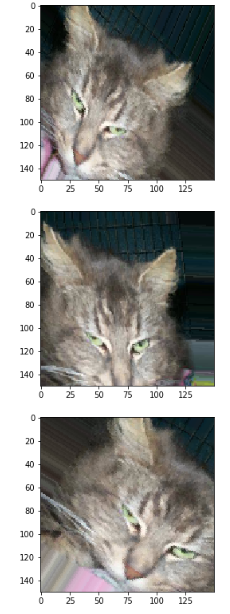

In [31]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [32]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/100
100/100 [==============================] - 149s 1s/step - loss: 0.6895 - acc: 0.5306 - val_loss: 0.6755 - val_acc: 0.5933
Epoch 2/100
100/100 [==============================] - 150s 2s/step - loss: 0.6789 - acc: 0.5568 - val_loss: 0.6478 - val_acc: 0.6237
Epoch 3/100
100/100 [==============================] - 150s 1s/step - loss: 0.6656 - acc: 0.5864 - val_loss: 0.6474 - val_acc: 0.6022
Epoch 4/100
100/100 [==============================] - 150s 2s/step - loss: 0.6441 - acc: 0.6228 - val_loss: 0.7096 - val_acc: 0.5254
Epoch 5/100
100/100 [==============================] - 148s 1s/step - loss: 0.6280 - acc: 0.6436 - val_loss: 0.6139 - val_acc: 0.6478
Epoch 6/100
100/100 [==============================] - 149s 1s/step - loss: 0.6113 - acc: 0.6540 - val_loss: 0.5834 - val_acc: 0.6802
Epoch 7/100
100/100 [==============================] - 149s 1s/step - loss: 0.6022 - acc: 0.6652 - val_loss: 0.5726 - val_acc: 0.6929
Epoch 8/100
100/100 [==============================] - 149s 1s

Epoch 62/100
100/100 [==============================] - 165s 2s/step - loss: 0.4071 - acc: 0.8191 - val_loss: 0.4251 - val_acc: 0.8204
Epoch 63/100
100/100 [==============================] - 154s 2s/step - loss: 0.3966 - acc: 0.8172 - val_loss: 0.4311 - val_acc: 0.8014
Epoch 64/100
100/100 [==============================] - 147s 1s/step - loss: 0.3856 - acc: 0.8258 - val_loss: 0.4139 - val_acc: 0.8033
Epoch 65/100
100/100 [==============================] - 147s 1s/step - loss: 0.3947 - acc: 0.8241 - val_loss: 0.4199 - val_acc: 0.8109
Epoch 66/100
100/100 [==============================] - 146s 1s/step - loss: 0.3963 - acc: 0.8188 - val_loss: 0.4157 - val_acc: 0.8192
Epoch 67/100
100/100 [==============================] - 147s 1s/step - loss: 0.3800 - acc: 0.8269 - val_loss: 0.4464 - val_acc: 0.8135
Epoch 68/100
100/100 [==============================] - 150s 1s/step - loss: 0.3739 - acc: 0.8393 - val_loss: 0.4845 - val_acc: 0.7868
Epoch 69/100
100/100 [==============================] -

In [33]:
model.save("project_cnn.h5")

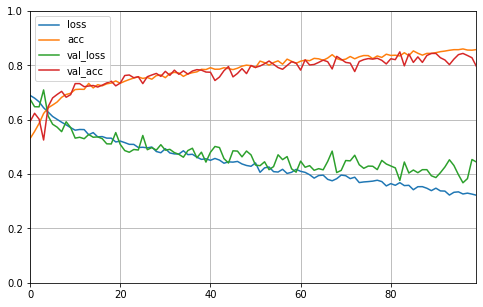

In [38]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [3]:
keras.backend.clear_session
del model

NameError: name 'model' is not defined

# VGG16

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [23]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

In [10]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [11]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [22]:
# conv_base.trainable = False

In [13]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

In [14]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("CNN_Project_Model-{epoch:02d}.h5")

In [15]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,
      callbacks=[checkpoint_cb])

Epoch 1/30
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
100/100 [==============================] - 1080s 11s/step - loss: 0.4760 - acc: 0.7605 - val_loss: 0.2296 - val_acc: 0.9060
Epoch 2/30
100/100 [==============================] - 1079s 11s/step - loss: 0.2812 - acc: 0.8790 - val_loss: 0.1333 - val_acc: 0.9430
Epoch 3/30
100/100 [==============================] - 1080s 11s/step - loss: 0.2061 - acc: 0.9115 - val_loss: 0.1012 - val_acc: 0.9630
Epoch 4/30
100/100 [==============================] - 1083s 11s/step - loss: 0.1911 - acc: 0.9250 - val_loss: 0.0926 - val_acc: 0.9640
Epoch 5/30
100/100 [==============================] - 1079s 11s/step - loss: 0.1531 - acc: 0.9380 - val_loss: 0.0908 - val_acc: 0.9670
Epoch 6/30
100/100 [==============================] - 1079s 11s/step - loss: 0.1300 - acc: 0.9545 - val_loss: 0.0901 - val_acc: 0.9630
Epoch 7/30
100/100 [==============================] - 1082s 11s/step - loss: 0.1271 - acc: 0.949

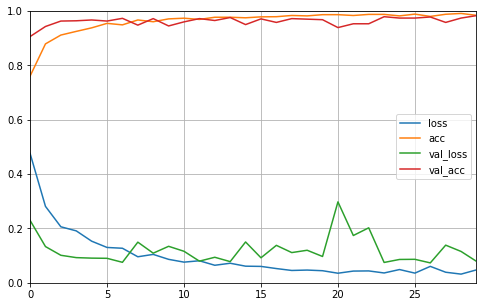

In [16]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [17]:
hist_df = pd.DataFrame(history.history) 

In [18]:
hist_csv_file = 'history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [19]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 1000 images belonging to 2 classes.


In [21]:
model.evaluate_generator(test_generator, steps=50)

[0.15674497428361064, 0.971]